 Цель состоит в том, чтобы ответить на вопрос: есть ли у пациента диабет, основываясь на определенных диагностических измерениях, включенных в набор данных, который получен из исходной базы данных наложением нескольких ограничений. В частности, в рассматриваемых в задании данных, все пациенты — женщины не менее 21 года индийского происхождения Пима.

Набор данных состоит из таких предикторов, как количество беременностей у пациентки, индекс массы тела, уровень инсулина, возраст и так далее. Отклик принимает два значение — больна (1) диабетом или нет (0).

Импортируем нужные нам библиотеки

In [14]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%matplotlib inline

In [39]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Отберем первые 690 строк

In [5]:
task_data = df.head(690)
task_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
685,2,129,74,26,205,33.2,0.591,25,0
686,3,130,64,0,0,23.1,0.314,22,0
687,1,107,50,19,0,28.3,0.181,29,0
688,1,140,74,26,180,24.1,0.828,23,0


Вывод числа строк в получившейся выборке, относящихся к классу 0 (не болеет диабетом)

In [20]:
len(task_data[task_data['Outcome'] == 0])

453

Разделим данные на обучающие и тестовые в отношении 80% к 20%

In [21]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

Выделим предикторы - первые 8 столбцов. Отклик - **Outcome**

In [22]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

Зададим параметры дерева принятия решений и обучаем модель

In [23]:
tree = DecisionTreeClassifier(criterion = 'entropy',
                              min_samples_leaf = 10,
                              max_leaf_nodes = 20,
                              random_state = 2020)
clf = tree.fit(x, y)

Визуализируем дерево

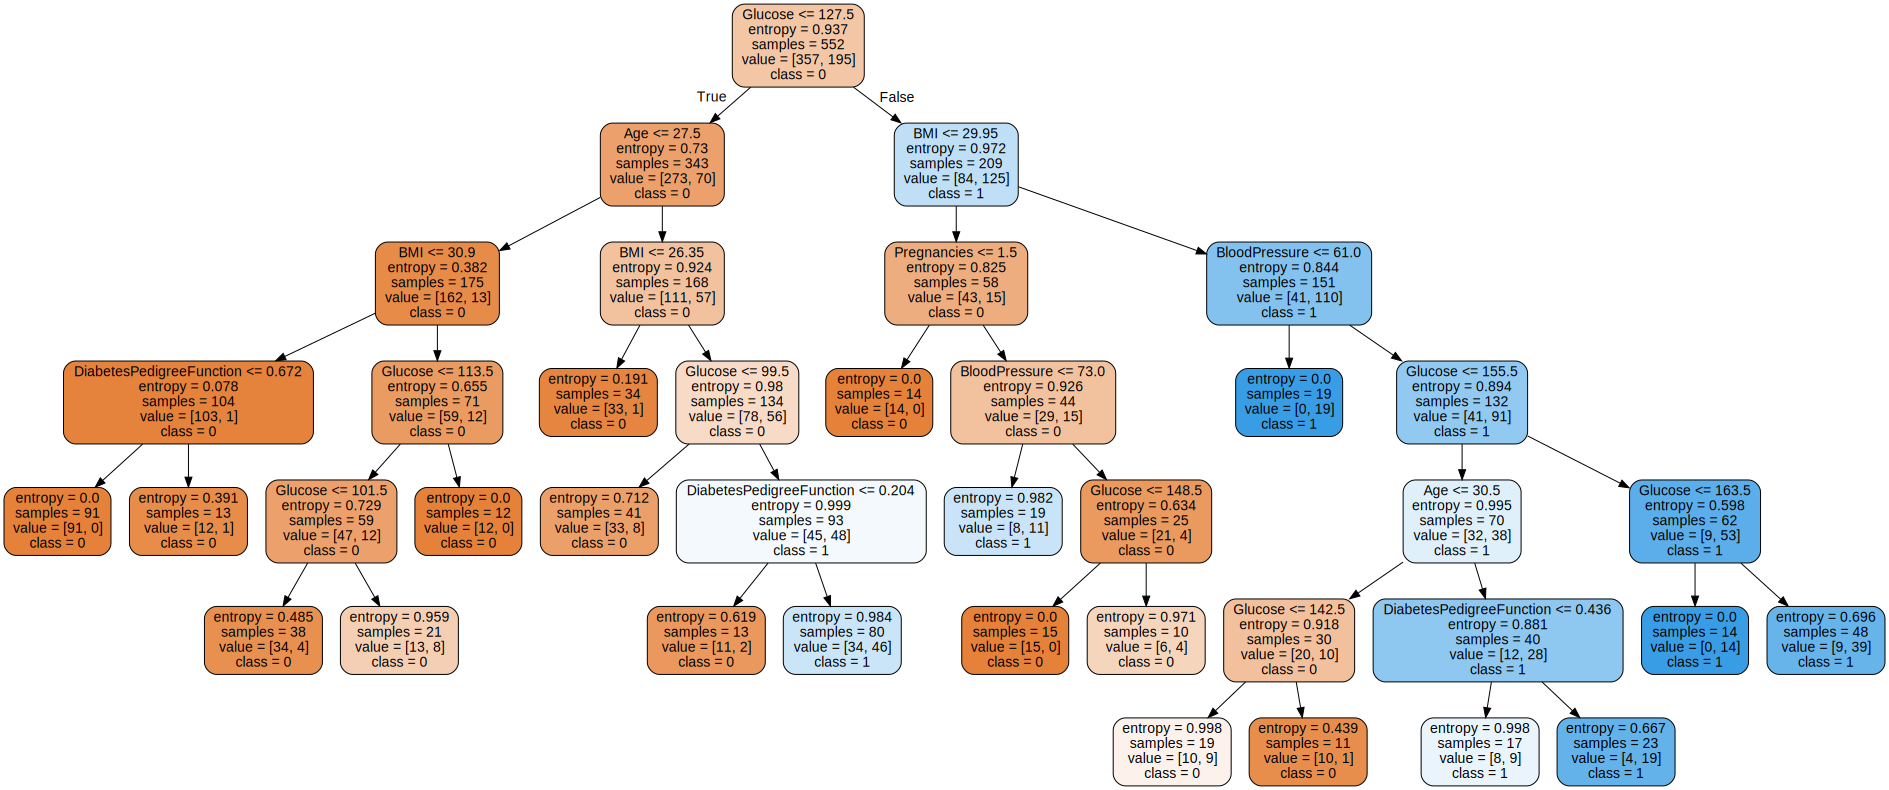

In [42]:
columns = list(x.columns)
export_graphviz(clf, out_file = 'tree.dot',
                feature_names = columns,
                class_names = ['0', '1'],
                rounded = 2, filled = True, label = 'all')
with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Выведим глубину дерева

In [41]:
clf.tree_.max_depth

6

Выполним предсказание для объектов из тестовой выборки

Доля правильных ответов классификатора.

In [26]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)
accuracy_score(y_true, y_pred)

0.7898550724637681

Среднее значение метрик **F1** (Macro-F1)

In [27]:
f1_score(y_true, y_pred, average = 'macro')

0.7534955343393901

Выполним предсказание для конкретного пациента (с индексом 708) исходных данных.

In [36]:
df.loc[729, features]

Pregnancies                  2.000
Glucose                     92.000
BloodPressure               52.000
SkinThickness                0.000
Insulin                      0.000
BMI                         30.100
DiabetesPedigreeFunction     0.141
Age                         22.000
Name: 729, dtype: float64

Назначенный класс:

In [37]:
clf.predict([df.loc[729, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0